In [0]:
bvgdimport numpy as np
from pathlib import Path
import csv, re, os 
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import math

# Pre-Processing
from sklearn import preprocessing
# Keras
from keras.models import Sequential, Model
from keras.utils.np_utils import to_categorical 
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder 


from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)



from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation , Dropout
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras 
from keras import optimizers


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd /gdrive

/gdrive


In [0]:
print(np.ones([60]))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
def Load_Data():
    # Get Input and Target Data
    input_data = np.ones([1,60])
    target_data_binary_PHQ = [0]
    target_data_score_PHQ = [0]
    
    i = 1
    target_data_csv = Path('./My Drive/Zeineb/small_dataset.csv')
    with open(target_data_csv, 'r') as csvFile:
        reader = csv.reader(csvFile)
        for row in reader:
            try:
                participant_ID = str(re.split('\t', row[0])[0])
                binary_PHQ8 = int(re.split('\t', row[1])[0])
                score_PHQ8 = int(re.split('\t', row[2])[0])
                print(" ## \n Participant ID is:{}, with Binary PHQ:{} , and Score PHQ:{} : ", participant_ID, binary_PHQ8, score_PHQ8)
                
                csv_file_path = './My Drive/Zeineb/'+participant_ID+'_P/split/Participant/'   
                if os.path.exists(csv_file_path):
                    input_directory = Path(csv_file_path)
                    for my_csv_filename in input_directory.glob("*_AUDIO_*.csv"):  
                        # Extract the .csv filename   
                        my_csv_filename = my_csv_filename.stem
                        print("## \n Retrieving coef matrix from file: ", my_csv_filename)

                        io = pd.read_csv(csv_file_path+my_csv_filename+'.csv', sep=",", usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60))
                         
                        # Get the Matrix
                        i = i+1
                        io = np.array(io, dtype=np.float64)
                        """ io -= np.mean(io, axis=0)
                        io /= np.nan_to_num(np.std(io, axis=0), copy=False)
                        """
                        print("###################################################",i)
                        
                        input_data = np.append(input_data, io, axis=0)                       
                        for j in range(io.shape[0]):
                            target_data_binary_PHQ.append(binary_PHQ8)
                            target_data_score_PHQ.append(score_PHQ8)
                            
            except ValueError:
                print("Skipping the following line: ", row[0])
    csvFile.close()            
                
    print("the size of my list-input-matrix: ", i)
    
    return input_data, target_data_binary_PHQ, target_data_score_PHQ

# Loading data
input_data, target_data_binary_PHQ, target_data_score_PHQ = Load_Data()

Skipping the following line:  Participant_ID
 ## 
 Participant ID is:{}, with Binary PHQ:{} , and Score PHQ:{} :  319 1 13
## 
 Retrieving coef matrix from file:  319_AUDIO_58
################################################### 2
## 
 Retrieving coef matrix from file:  319_AUDIO_14
################################################### 3
## 
 Retrieving coef matrix from file:  319_AUDIO_76
################################################### 4
## 
 Retrieving coef matrix from file:  319_AUDIO_7
################################################### 5
## 
 Retrieving coef matrix from file:  319_AUDIO_9
################################################### 6
## 
 Retrieving coef matrix from file:  319_AUDIO_17
################################################### 7
## 
 Retrieving coef matrix from file:  319_AUDIO_99
################################################### 8
## 
 Retrieving coef matrix from file:  319_AUDIO_47
################################################### 9
## 
 Retrieving coef ma

In [0]:
data=pd.DataFrame(input_data)


In [0]:
target = np.asarray(target_data_binary_PHQ, dtype=int)
sain = target_data_binary_PHQ.count(0)
ill= target_data_binary_PHQ.count(1)
print('ill : {}'.format(ill))
print('sain: {}'.format(sain))

ill : 113005
sain: 239153


In [0]:
sain=np.random.choice(sain,ill)
print(len(sain))

113005


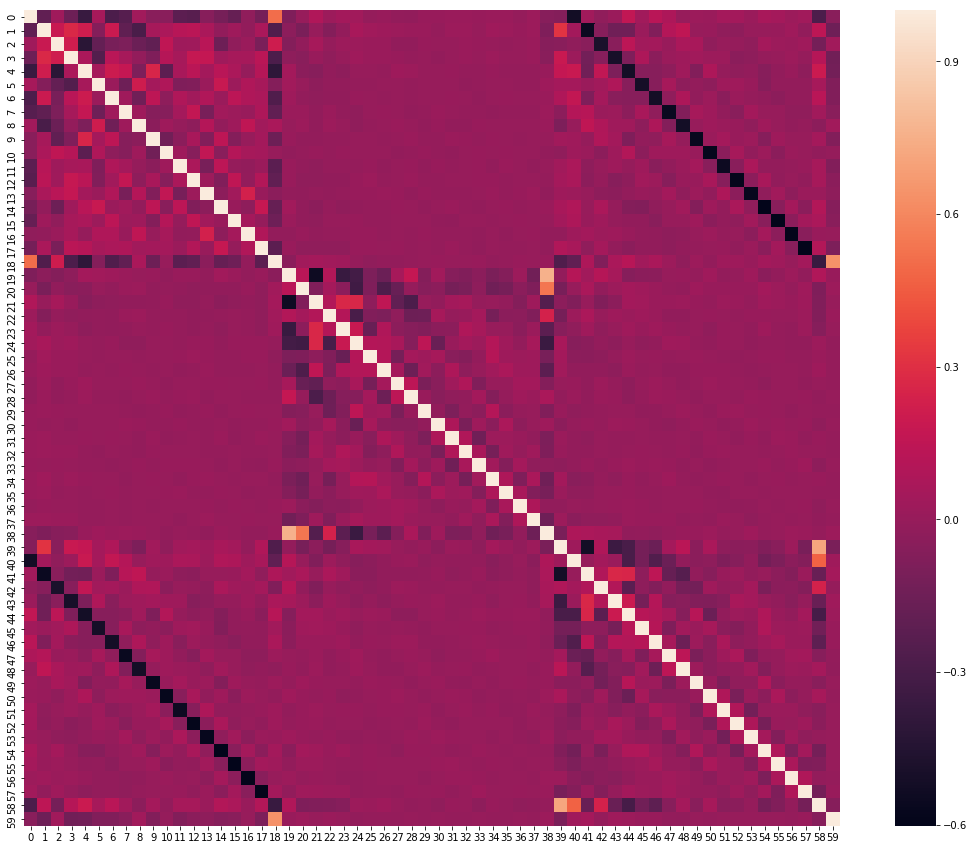

In [0]:
# Correlation matrix
import seaborn as sns
corrmat = data.corr()
fig = plt.figure(figsize = (20, 15))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

In [0]:
# Splitting into Training and Testing datasets
from sklearn.model_selection import train_test_split

np.nan_to_num(input_data, copy=False)
input_data = np.asarray(input_data, dtype=np.float64)
print (input_data)

x_train, x_test, y_train, y_test = train_test_split(input_data, target, test_size = 0.2 , random_state = 100)

# Normalizing Training data
np.nan_to_num(x_train, copy=False)
#print(x_train)
x_train -= np.mean(x_train, axis=0)
np.nan_to_num(x_train, copy=False)
#print("####")
#print(x_train)
x_train /= np.std(x_train, axis=0)
np.nan_to_num(x_train, copy=False)
#print("####")
#print(x_train)

# Normalizing Testing data
np.nan_to_num(x_test, copy=False)
#print(x_test)
x_test -= np.mean(x_test, axis=0)
np.nan_to_num(x_test, copy=False)

#print("####")
#print(x_test)
x_test /= np.std(x_test, axis=0)
np.nan_to_num(x_test, copy=False)
#print("####")
#print(x_test)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-2.19695571e+00 -9.48982874e-02  7.76339981e-01 ...  1.53196434e+00
  -1.07042492e+01  2.75851848e+01]
 [ 7.82223746e-01  1.79071644e-01  7.50802662e-01 ...  2.13356426e+00
  -2.26725101e+01  2.91950588e+01]
 ...
 [-7.92667331e+00  3.97926309e-01  1.44099178e-01 ...  2.64167158e+00
   3.35432701e-01  3.70407993e+01]
 [-3.20054036e+00 -2.23987175e-01  6.86589864e-01 ...  1.46902401e+00
   6.83982146e+00  3.50048278e+01]
 [ 1.59346387e+00 -1.58901331e+00  2.61621719e-01 ...  5.98148722e-03
   1.03669115e+01  3.14171277e+01]]


array([[-1.50743033,  0.97426794,  0.63863449, ...,  0.47748498,
        -1.66317456,  0.33629967],
       [ 0.4418628 ,  0.0596604 , -0.26494703, ..., -0.00962924,
        -0.18933393,  0.1908396 ],
       [ 0.5816248 , -1.73439918,  0.42727041, ...,  0.06331825,
        -2.910547  ,  0.27211672],
       ...,
       [-0.76776565, -0.09398049, -0.46913646, ..., -0.46306286,
        -0.22031379, -0.2555302 ],
       [-0.2723375 ,  1.55117828,  1.14473392, ...,  2.19224694,
         0.1749437 ,  0.11141658],
       [ 0.03989279,  0.32190864, -0.36016601, ...,  0.19745081,
         0.61879862, -0.10336932]])

In [0]:
data =pd.DataFrame(x_train)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05,2.817260e+05
mean,-1.541406e-14,1.328607e-14,-1.555499e-15,-6.190451e-15,-2.034999e-14,6.228066e-15,2.867804e-15,-5.748340e-16,-1.193400e-15,6.500177e-15,-1.136395e-15,4.178326e-15,-1.006706e-16,1.920092e-15,-9.495312e-15,4.222832e-15,-2.014921e-15,7.438250e-16,3.600187e-14,1.792098e-16,-1.148527e-16,1.563469e-17,2.094372e-17,-8.932746e-17,-1.409774e-16,-3.059669e-17,-2.240075e-16,-6.862295e-17,-4.807922e-17,7.062842e-17,-1.154336e-17,-5.485058e-17,7.339327e-18,-1.836377e-16,-1.344866e-16,6.880462e-17,-2.706692e-17,3.495441e-17,-4.122460e-16,-1.507120e-16,-4.532894e-18,-1.819137e-17,-1.390153e-16,2.038571e-17,1.185161e-16,-6.979378e-17,1.498472e-16,-6.258920e-17,2.746494e-17,-1.343100e-17,-2.049368e-17,-6.498363e-18,-5.383829e-17,9.666758e-18,6.501967e-17,9.338254e-17,-2.377479e-17,7.913185e-17,-2.266033e-16,7.365281e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.841036e+00,-4.379416e+00,-4.154709e+00,-4.796253e+00,-4.306949e+00,-4.515638e+00,-5.140452e+00,-4.877462e+00,-4.965185e+00,-5.196641e+00,-5.084794e+00,-4.494791e+00,-5.951552e+00,-4.979934e+00,-6.087043e+00,-5.214144e+00,-5.625421e+00,-7.068089e+00,-4.459269e+00,-4.416165e+00,-5.972488e+00,-5.766957e+00,-6.278731e+00,-6.482994e+00,-6.320043e+00,-6.471728e+00,-6.244891e+00,-5.717561e+00,-5.770959e+00,-5.930343e+00,-5.869068e+00,-6.299388e+00,-6.507940e+00,-6.441652e+00,-6.142761e+00,-6.071501e+00,-7.261506e+00,-6.890498e+00,-4.826462e+00,-4.182627e+01,-5.973080e+00,-5.826901e+00,-6.792722e+00,-6.785273e+00,-6.669989e+00,-6.621233e+00,-6.106499e+00,-5.883626e+00,-5.861215e+00,-5.758246e+00,-6.221063e+00,-6.068608e+00,-6.531809e+00,-6.285199e+00,-6.928207e+00,-6.716836e+00,-8.036840e+00,-7.756866e+00,-6.048009e+00,-8.503404e+00
25%,-7.355236e-01,-6.480586e-01,-6.854323e-01,-5.573177e-01,-6.358808e-01,-6.263011e-01,-6.159998e-01,-6.324101e-01,-6.155521e-01,-6.023695e-01,-6.247969e-01,-6.268307e-01,-6.241158e-01,-6.288406e-01,-6.315727e-01,-6.490241e-01,-6.402534e-01,-6.510925e-01,-5.826967e-01,-4.234298e-01,-3.551978e-01,-5.035308e-01,-5.401197e-01,-5.311017e-01,-5.230407e-01,-5.809776e-01,-5.697587e-01,-5.879657e-01,-5.821725e-01,-6.013507e-01,-5.959476e-01,-6.135911e-01,-6.111315e-01,-6.130123e-01,-6.099987e-01,-6.207318e-01,-6.269874e-01,-6.235353e-01,-4.124409e-01,-4.265752e-01,-3.927839e-01,-4.971067e-01,-5.

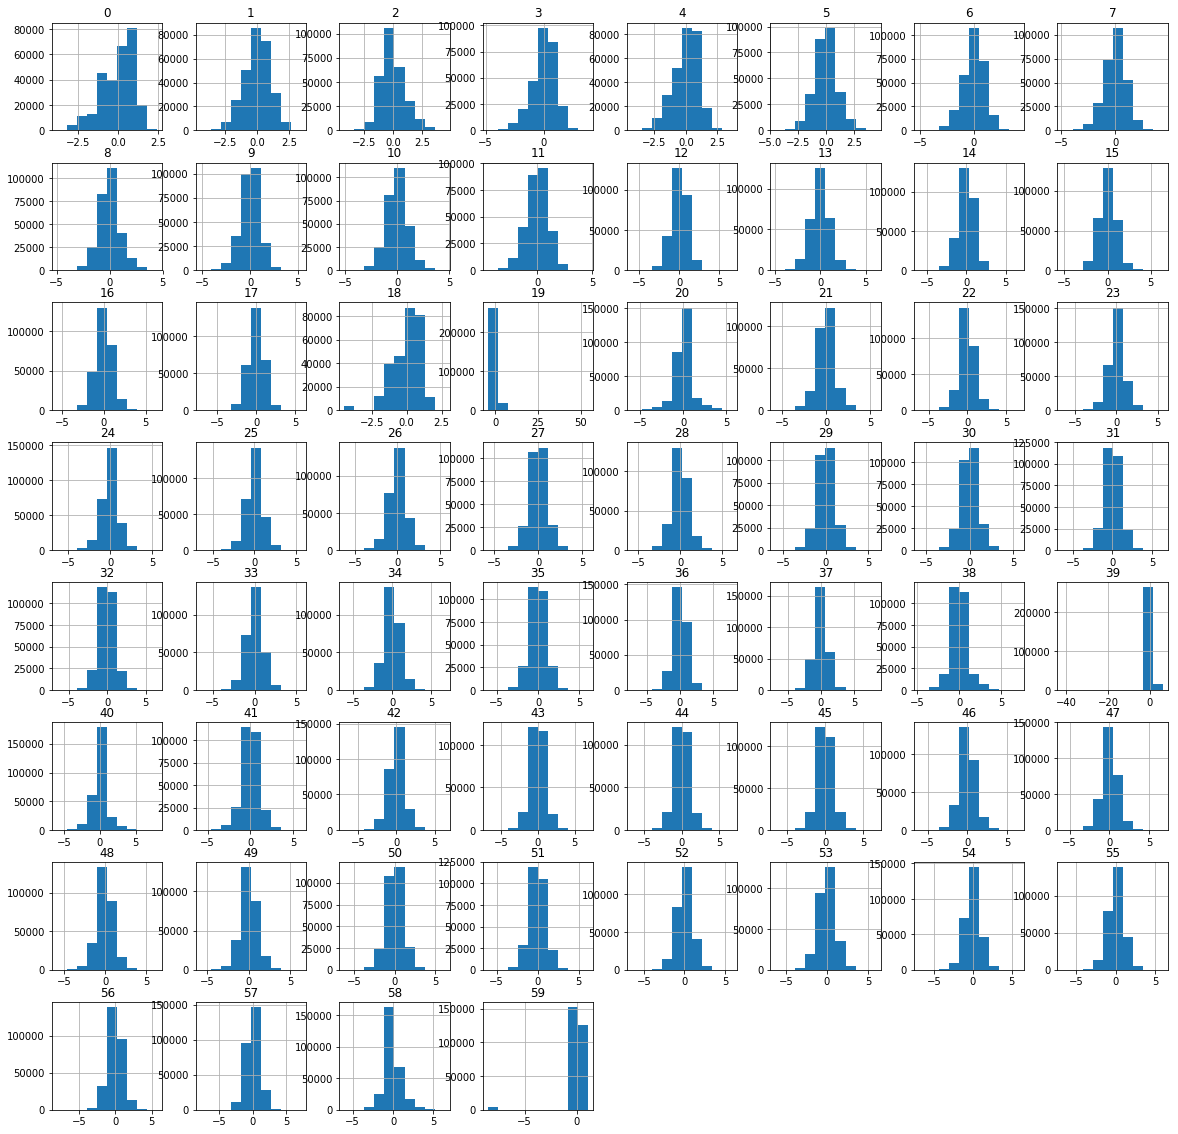

In [0]:
data.hist(figsize=(20,20));

In [0]:
data.info()